In [67]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestRegressor
import os
from sklearn import svm
from sklearn import datasets
from sklearn.svm import SVR 

In [40]:
df1 = pd.read_excel(r"C:\Users\pauli\Downloads\b2c_gv_vartojimas.xlsx")

In [41]:
df_o1 = pd.read_csv(r"C:\Users\pauli\Downloads\orai_801_1030.csv")
df_01_org = df_o1

In [42]:
# df_o1 = df_01_org

In [43]:
df_o1['cloud_cover'] = df_o1['cloud_cover'].fillna(100.0)

In [44]:
df_o1['condition_code_1'] = LabelEncoder().fit_transform(df_o1['condition_code'])
condition_code = dict(zip(df_o1['condition_code'], df_o1['condition_code_1']))

In [45]:
print(condition_code)

{'partly-cloudy': 10, 'variable-cloudiness': 17, 'cloudy': 1, 'clear': 0, 'cloudy-with-sunny-intervals': 2, 'light-rain': 6, 'rain': 11, 'heavy-rain': 5, 'thunderstorms': 16, 'light-rain-at-times': 7, 'thunder': 15, 'mist': 9, 'rain-at-times': 12, 'rain-showers': 13, 'fog': 3, 'hail': 4, 'light-sleet': 8, 'sleet': 14}


In [46]:
df_o1['obs_time_utc'] = pd.to_datetime(df_o1['obs_time_utc'])

In [47]:
df_o1.rename(columns={'obs_time_utc': 'dateTime'}, inplace=True)

In [48]:
df_o1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2184 entries, 0 to 2183
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   dateTime                2184 non-null   datetime64[ns]
 1   air_temperature         2184 non-null   float64       
 2   feels_like_temperature  2184 non-null   float64       
 3   wind_speed              2184 non-null   float64       
 4   wind_gust               2184 non-null   float64       
 5   wind_direction          2184 non-null   int64         
 6   cloud_cover             2184 non-null   float64       
 7   sea_level_pressure      2184 non-null   float64       
 8   relative_humidity       2184 non-null   int64         
 9   precipitation           2184 non-null   float64       
 10  condition_code          2184 non-null   object        
 11  condition_code_1        2184 non-null   int64         
dtypes: datetime64[ns](1), float64(7), int64(3), obje

In [49]:
df1['viso'] = df1.iloc[:, 1:].sum(axis=1)
df1=df1[['dateTime', 'viso']].copy()
df1['valanda']=df1['dateTime'].dt.hour
df1['diena']=df1['dateTime'].dt.day
df1['menuo']=df1['dateTime'].dt.month
df1['sav_diena']=df1['dateTime'].dt.weekday

In [50]:
df1 = pd.merge(df1, df_o1, on='dateTime', how='left')
df1.drop('condition_code', axis=1, inplace=True)

In [51]:
df1_1031=df1[-25:-1].copy()
df1=df1[:-25]

In [52]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   dateTime                2160 non-null   datetime64[ns]
 1   viso                    2160 non-null   float64       
 2   valanda                 2160 non-null   int32         
 3   diena                   2160 non-null   int32         
 4   menuo                   2160 non-null   int32         
 5   sav_diena               2160 non-null   int32         
 6   air_temperature         2160 non-null   float64       
 7   feels_like_temperature  2160 non-null   float64       
 8   wind_speed              2160 non-null   float64       
 9   wind_gust               2160 non-null   float64       
 10  wind_direction          2160 non-null   float64       
 11  cloud_cover             2160 non-null   float64       
 12  sea_level_pressure      2160 non-null   float64 

<Axes: >

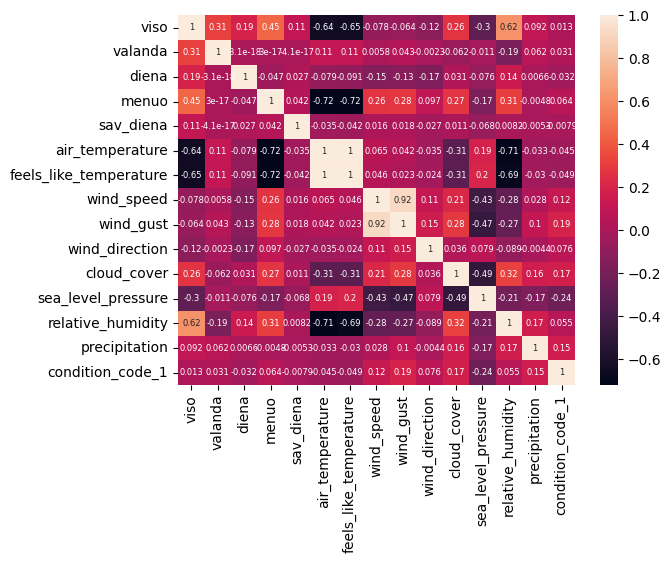

In [58]:
dt=df1.corr(numeric_only=True)
sns.heatmap(data=dt,annot=True, annot_kws={'fontsize':6})

In [59]:
Xmok= df1.drop(columns=['dateTime', 'viso'])
y=df1['viso']
xpred = df1_1031.drop(columns=['dateTime', 'viso'])
X_train, X_test, y_train, y_test = train_test_split(Xmok, y, test_size=0.1, random_state=30)
fit = LinearRegression().fit(X_train, y_train)

pred = fit.predict(X_test)
fit.score(X_test, y_test)*100.0
pred = fit.predict(xpred)
df1_1031['Linear'] = pred

In [60]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
# Make predictions
y_pred = rf.predict(X_test)
# Evaluate accuracy
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'Mean Absolute Percentage Error: {mape}%')
pred = rf.predict(xpred)
df1_1031['RandomForest']=pred

Mean Absolute Percentage Error: 8.73452037656424%


In [61]:
dt_regressor = DecisionTreeRegressor(random_state=35)

dt_regressor.fit(X_train, y_train)

y_pred = dt_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
# print(f"R-squared: {r2}")
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'Mean Absolute Percentage Error: {mape}%')
pred = dt_regressor.predict(xpred)
df1_1031['DecisionTree']= pred

Mean Squared Error: 9314.592070140568
Mean Absolute Percentage Error: 12.78443435636907%


In [69]:
svr = SVR(kernel='linear')  
svr.fit(X_train, y_train)  
pred = svr.predict(xpred)

df1_1031['SVRlinear']= pred

In [71]:
svr = SVR(kernel='poly')  
svr.fit(X_train, y_train)  
pred = svr.predict(xpred)

df1_1031['SVRpoly']= pred

In [72]:
svr = SVR(kernel='rbf')  
svr.fit(X_train, y_train)  
pred = svr.predict(xpred)

df1_1031['SVRrbf']= pred

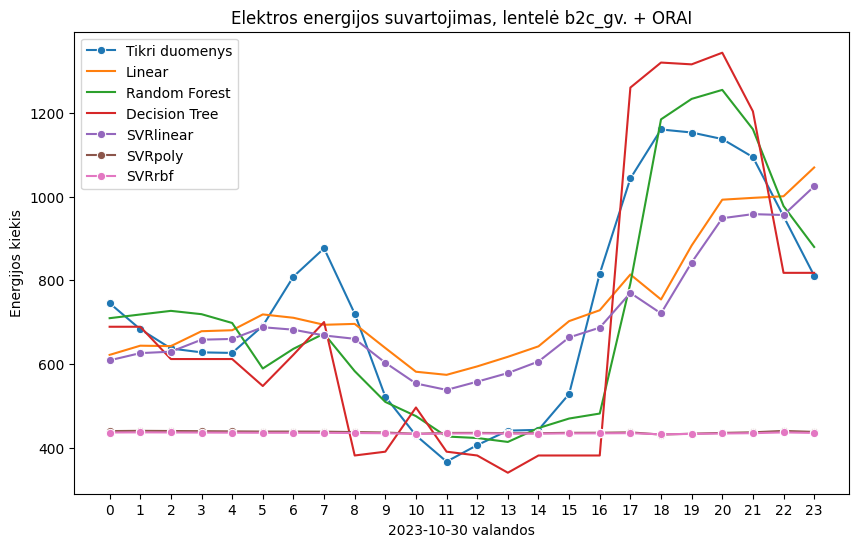

In [74]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=df1_1031, x='valanda', y='viso', label='Tikri duomenys', marker='o')
sns.lineplot(data=df1_1031, x='valanda', y='Linear', label='Linear')
sns.lineplot(data=df1_1031, x='valanda', y='RandomForest', label='Random Forest')
sns.lineplot(data=df1_1031, x='valanda', y='DecisionTree', label='Decision Tree')
sns.lineplot(data=df1_1031, x='valanda', y='SVRlinear', label='SVRlinear', marker='o')
sns.lineplot(data=df1_1031, x='valanda', y='SVRpoly', label='SVRpoly', marker='o')
sns.lineplot(data=df1_1031, x='valanda', y='SVRrbf', label='SVRrbf', marker='o')
plt.title('Elektros energijos suvartojimas, lentelė b2c_gv. + ORAI')
plt.ylabel('Energijos kiekis')
plt.xlabel('2023-10-30 valandos')
plt.xticks(ticks=df1_1031['valanda'], labels=df1_1031['valanda'])
# plt.xticks(rotation=0)
plt.show()

In [66]:
df1_1031.head(30)

,dateTime,viso,valanda,diena,menuo,sav_diena,air_temperature,feels_like_temperature,wind_speed,wind_gust,wind_direction,cloud_cover,sea_level_pressure,relative_humidity,precipitation,condition_code_1,Linear,RandomForest,DecisionTree
2160,2023-10-30 00:00:00,745.340335,0,30,10,0,7.0,7.0,3.6,6.0,167.0,88.0,1004.6,99.0,0.0,11.0,621.890416,709.548788,689.086368
2161,2023-10-30 01:00:00,683.211501,1,30,10,0,7.4,7.4,3.3,5.8,164.0,100.0,1004.3,98.0,0.1,6.0,643.859639,718.377744,689.086368
2162,2023-10-30 02:00:00,637.173832,2,30,10,0,7.9,7.9,3.4,5.8,176.0,100.0,1003.5,99.0,1.6,11.0,642.839429,727.029221,611.964799
2163,2023-10-30 03:00:00,627.920467,3,30,10,0,8.4,8.4,3.2,6.3,172.0,88.0,1003.0,99.0,0.3,6.0,678.417049,719.111135,611.964799
2164,2023-10-30 04:00:00,626.576100,4,30,10,0,8.7,8.7,3.9,6.8,184.0,88.0,1002.7,99.0,0.1,11.0,680.771128,698.081009,611.964799
2165,2023-10-30 05:00:00,691.266433,5,30,10,0,9.1,9.1,4.8,7.6,191.0,88.0,1002.5,97.0,0.0,1.0,718.532866,589.392237,547.535866
2166,2023-10-30 06:00:00,808.859468,6,30,10,0,9.2,9.2,3.4,7.5,190.0,88.0,1002.8,96.0,0.0,1.0,710.518620,636.415891,622.214900
2167,2023-10-30 07:00:00,876.396266,7,30,10,0,10.0,10.0,3.6,6.6,194.0,88.0,1002.9,96.0,0.3,11.0,693.771021,672.699399,700.328500
2168,2023-10-30 08:00:00,720.391066,8,30,10,0,11.0,11.0,4.3,7.6,207.0,88.0,1003.4,91.0,0.0,1.0,695.913655,583.093180,381.629200
2169,2023-10-30 09:00:00,522.039667,9,30,10,0,11.9,11.9,4.3,10.7,222.0,88.0,1003.7,86.0,0.0,1.0,638.327404,509.597280,390.723300
